<a href="https://colab.research.google.com/github/renatauribes/hello-world/blob/main/cargaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importación de las librerías:.

In [ ]:
import pandas as pd # Libreria para data frames
import numpy as np # Libreria para operaciones matemáticas
import matplotlib.pyplot as plt

Carga de la base de datos y creación del data frame:

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/EQUIPO RETO CIENCIA DE DATOS/datos_tec.csv')
df.head()

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051


Conteo de registros por columna:

In [ ]:
df.shape

(9392, 7)

Identificación de valores nulos en la base de datos:

In [ ]:
df.isnull().values.any()

True

Conteo de valores nulos por columna:

In [ ]:
df.isnull().sum()

TIME         0
Dureza       1
Tasa_Prod    0
Asp          1
EC           0
EE           0
Calidad      0
dtype: int64

Se eliminan las filas en las que se encuentra algún valor nulo, en este caso solo existen dos, por lo que es un cambio mínimo y el análisis no se verá afectado con dos registros menos.

In [ ]:
df.dropna(axis=0,how='any', thresh=None, subset=None, inplace=True)

Se comprueba que ya no existen valores nulos:

In [ ]:
df.isnull().sum()

TIME         0
Dureza       0
Tasa_Prod    0
Asp          0
EC           0
EE           0
Calidad      0
dtype: int64

In [ ]:
df.shape

(9390, 7)

Revisamos el tipo de datos que contiene cada columna:

In [ ]:
df.dtypes

TIME          object
Dureza       float64
Tasa_Prod      int64
Asp          float64
EC           float64
EE           float64
Calidad      float64
dtype: object

Obtención de las métricas básicas del arreglo inicial:

In [ ]:
df.median()

Dureza       104.000
Tasa_Prod    398.000
Asp            3.260
EC            19.200
EE            20.000
Calidad        0.081
dtype: float64

In [ ]:
df.max()

TIME         31/12/2019 0:00
Dureza                   112
Tasa_Prod                480
Asp                     3.52
EC                      40.4
EE                      35.3
Calidad                    1
dtype: object

In [ ]:
df.min()

TIME         01/01/1995 0:00
Dureza                    80
Tasa_Prod                  0
Asp                     0.09
EC                         0
EE                         0
Calidad                    0
dtype: object

In [ ]:
df.std()

Dureza        2.049142
Tasa_Prod    43.357246
Asp           0.375264
EC            6.698935
EE            8.035938
Calidad       0.048824
dtype: float64

In [ ]:
df.quantile([0.25,0.5,0.75])

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0.25,103.0,383.0,3.04,15.9,14.2,0.061
0.50,104.0,398.0,3.26,19.2,20.0,0.081
0.75,105.0,408.0,3.38,23.5,25.2,0.107


In [ ]:
df.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,104.028754,391.003940,3.152330,19.361544,19.059350,0.089890
std,2.049142,43.357246,0.375264,6.698935,8.035938,0.048824
min,80.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,103.000000,383.000000,3.040000,15.900000,14.200000,0.061000
50%,104.000000,398.000000,3.260000,19.200000,20.000000,0.081000
75%,105.000000,408.000000,3.380000,23.500000,25.200000,0.107000
max,112.000000,480.000000,3.520000,40.400000,35.300000,1.000000


**Para identificar los outliers de cada columna:**

In [ ]:
import seaborn as sns # Libreria de visualización
import matplotlib.pyplot as plt


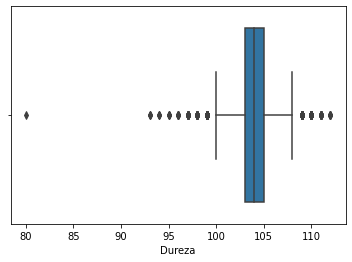

In [ ]:
sns.boxplot(x=df['Dureza'], showfliers =True)


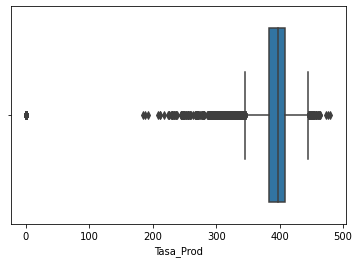

In [ ]:
sns.boxplot(x=df['Tasa_Prod'])

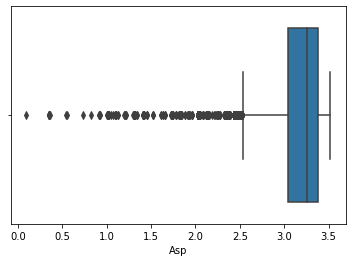

In [ ]:
sns.boxplot(x=df['Asp'])

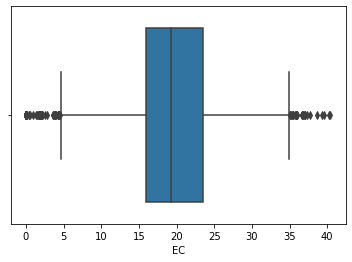

In [ ]:
sns.boxplot(x=df['EC'])

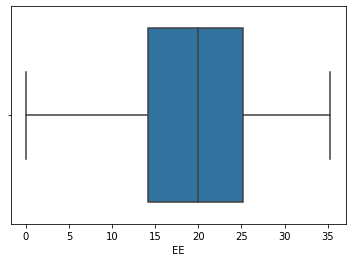

In [ ]:
sns.boxplot(x=df['EE'])

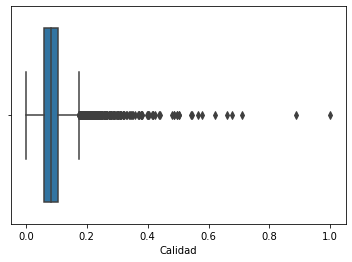

In [ ]:
sns.boxplot(x=df['Calidad'])

**Eliminar Outliers**

In [ ]:
# Eliminar Outliers




**Análisis de correlación de datos**

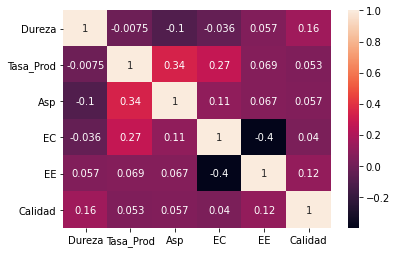

In [ ]:
# Análisis de correlación de datos

df_small = df.iloc[:,:]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

**Histograma por variables**

In [ ]:
# Histograma de las variables 

plt.figure(figzise=[10,5])
tasa_prod = df.iloc[:, 1]
t = tasa_prod

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d3ea41cf8>,
      dtype=object)

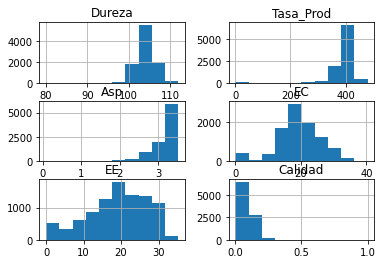

In [ ]:
df.hist()

**Diagramas de dispersión de las variables EE y EC con el resto de las variables para encontrar posibles patrones**

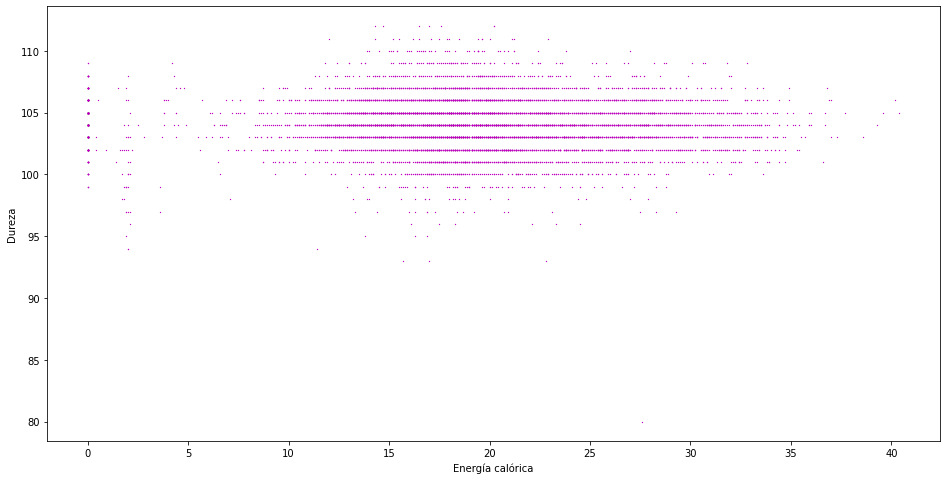

In [ ]:
# Código de scatter plot (dispersión)
# EC y Dureza
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['EC'], df['Dureza'], s = 0.120, c = 'm', marker = 'x')
ax.set_xlabel('Energía calórica')
ax.set_ylabel('Dureza')
plt.show()